In [2]:
import os
import pandas as pd
from pathlib import Path
import numpy as np
import plotnine as gg
import matplotlib.pyplot as plt

## Directories and Filepath

In [3]:
path = os.getcwd()

topdir="Performance"
subdir='W47_2020'
figures = "figures"

folderpath = os.path.join(Path("../", topdir), subdir)

figpath = os.path.join(folderpath, figures)


def create_folder(path):
    
        
    if not os.path.exists(path):
        print ("figure directory is created")
        return os.makedirs(path)

    
    
folder = create_folder(folderpath)

figdir = create_folder(figpath)


csvpath = [os.path.join(folderpath, f) for f in os.listdir(folderpath)]

apriso_path = [f for f in csvpath if "Apriso" in f][0]
tracker_path = [f for f in csvpath if "Tracker" in f][0]

data_apriso = pd.read_csv(apriso_path)

tracker_columns = ['DATE','RBU 6701_SN', 'FAIL Category', 'Fail Group', 'TRSH NAME',
       'STATUS', 'Notes', 'REPAIR Person', 'REPAIR NOTES', 'PRE-TRSH Person']

data_tracker = (pd.read_csv(tracker_path, engine='python')
                .loc[:, tracker_columns]
               )





#data_tracker.DATE = data_tracker.DATE.astype('str')

#data_tracker['DATE'] = data_tracker['DATE'].apply(lambda x: x.split(' ')[0])


/Users/habbasi/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,9) have mixed types.Specify dtype option on import or set low_memory=False.


In [4]:
data_tracker.head()

,DATE,RBU 6701_SN,FAIL Category,Fail Group,TRSH NAME,STATUS,Notes,REPAIR Person,REPAIR NOTES,PRE-TRSH Person
0,"Monday, November 16, 2020",EA2A106620,DIG.,"CHK_SYNC_LED_HUE, Hue of SYNC LED (11)",Maged Y.,PASS,NaN,NaN,NaN,NaN
1,"Monday, November 16, 2020",EA2A106677,DIG.,"ID.D15000A4, ID.D15000A4",Maged Y.,PASS,NaN,NaN,NaN,NaN
2,"Monday, November 16, 2020",EA2A106701,DIG.,"RU_CPRI_P0_1, Check if Sliver CPRI port 0 is Up",Maged Y.,BB+Node,NaN,NaN,NaN,NaN
3,"Monday, November 16, 2020",EA2A106544,DIG.,"STAB_10M_5MIN, Stability for measured clock - ...",Maged Y.,PASS,NaN,Rachel E.,Passive Comp.,Kazeem K.
4,"Monday, November 16, 2020",EA2A052783,I.C.O. (TRSH),NaN,NaN,NaN,NaN,NaN,NaN,Tuan L.


In [5]:
data_tracker.shape

(722, 10)

## Functions

This function is for renaming of Failure Categories for all departments

In [97]:

def repair_dept_namechange(x):
    
    if (x['FAIL Category'] == 'RF') | (x['FAIL Category'] == 'DIG.'):
        return "Radio"
    
    elif (x['FAIL Category'] == 'MBFT'):
        return "MBFT"
    
    elif (x['FAIL Category'] == 'MVI'):
        return "MVI"
    
    elif (x['FAIL Category'] == 'SMA Repair') | (x['FAIL Category'] == 'SMA REPAIR'):
        return "SMA Repair"
    
    elif (x['FAIL Category'] == 'I.C.O. (TRSH)'):
        return "I.C.O. (TRSH)"
    
    elif (x['FAIL Category'] ==  'Re-work Order'):
        return "Re-work Order"
    
    elif (x['FAIL Category'] ==  "Mech."):
        return "Mech."
    
    elif (x['FAIL Category'] == 'Validation Radio Test'):
        return 'Validation Radio Test'
    



# Repair department

In [9]:
TRSH_NAME=['Bo B.','Maged Y.','Matthew T.','Mekedes W.',
           'Michael Smith U.','Omar V.','Samuel T.',
           'Sujin K.','Yohannes A.']


REPAIR_NAME=['Daniel S.','Khaliah T.','Nelson L.',
             'Rachel E.','Tamela B.','Thai L.', 'Tri N.']


PRETRSH_NAME=['Alton W.','Eric T.','Kazeem K.','Luis G.','Scott N.','Ve']


MVI_NAME=['Phat N.','Tri N.','Tuan L.']


Ist_shift = ['Bo B.','Maged Y.','Matthew T.','Michael Smith U.',
             'Sujin K.','Yohannes A.', 'Daniel S.','Khaliah T.',
             'Rachel E.', 'Alton W.','Kazeem K.','Scott N.', 
             'Phat N.','Tuan L.']


Sec_shift = ['Mekedes W.','Omar V.','Samuel T.','Nelson L.',
             'Tamela B.','Thai L.', 'Tri N.', 'Eric T.',
             'Luis G.','Ve']


,DATE,RBU 6701_SN,FAIL Category,Fail Group,TRSH NAME,STATUS,Notes,REPAIR Person,REPAIR NOTES,PRE-TRSH Person,ProductNo,Shift
0,"Monday, November 16, 2020",EA2A106620,DIG.,"CHK_SYNC_LED_HUE, Hue of SYNC LED (11)",Maged Y.,PASS,NaN,NaN,NaN,NaN,KRK10101/21,1st_shift
2,"Monday, November 16, 2020",EA2A106677,DIG.,"ID.D15000A4, ID.D15000A4",Maged Y.,PASS,NaN,NaN,NaN,NaN,KRK10101/21,1st_shift
4,"Monday, November 16, 2020",EA2A106701,DIG.,"RU_CPRI_P0_1, Check if Sliver CPRI port 0 is Up",Maged Y.,BB+Node,NaN,NaN,NaN,NaN,KRK10101/21,1st_shift
6,"Monday, November 16, 2020",EA2A106544,DIG.,"STAB_10M_5MIN, Stability for measured clock - ...",Maged Y.,PASS,NaN,Rachel E.,Passive Comp.,Kazeem K.,KRK10101/21,1st_shift
8,"Monday, November 16, 2020",EA2A052783,I.C.O. (TRSH),NaN,NaN,NaN,NaN,NaN,NaN,Tuan L.,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
967,"Friday, November 20, 2020",EA2A108442,RF,"2.67.1.0.1.05, RX config mode 1 Br1 DSA 1 att ...",Samuel T.,REPAIR,NaN,NaN,NaN,NaN,NaN,2nd_shift
968,"Friday, November 20, 2020",EA2A108437,RF,"3.28.M, TX Spurious Emission M",Samuel T.,OTA,NaN,NaN,NaN,Luis G.,KRK10101/11,2nd_shift
969,"Friday, November 20, 2020",EA2A111786,RF,"2.23.1.0.01, TX phase shifter characterization...",Samuel T.,REPAIR,NaN,NaN,NaN,NaN,NaN,2nd_shift
970,"Friday, November 20, 2020",EA2A108428,RF,"2.67.1.0.3.05, RX config mode 1 Br3 DSA 2 att ...",Mekedes W.,REPAIR,NaN,NaN,NaN,NaN,NaN,2nd_shift


In [10]:
# data_tracker.columns
# col = ['RBU 6701_SN', 'FAIL Category', 'Fail Group', 'TRSH NAME',
#        'STATUS', 'Notes', 'REPAIR Person', 'REPAIR NOTES', 'PRE-TRSH Person',
#        'Unnamed: 10', 'Unnamed: 11']


# tmp = data_tracker.dropna(subset=[col], thresh=11)

# tmp
# # tmp = data_tracker[data_tracker['RBU 6701_SN'].isnull()].reset_index()
# # tmp

## Orgnaizing Apriso file and dropping columns

In [14]:
# products_name = ['KRK10101/11', 'KRK10101/21', 'ROA1286713/1']


# data_apriso = data_apriso.query("ProductNo in @ products_name")


apriso_columns = ['Serial #', 'Level 1', 'Level 2', 'Level 3', 'ProductNo']

data_apriso = data_apriso.loc[:, apriso_columns]


data_apriso['combined'] = data_apriso[data_apriso.columns[0:4]].apply(
    lambda x: ''.join(x.dropna().astype(str)),
    axis=1
)

data_apriso = (data_apriso.drop(columns=['Serial #', 'Level 1', 'Level 2', 'Level 3'])
               .rename(columns={"combined": "RBU 6701_SN"})
)


data_apriso= (data_apriso.loc[:, ['RBU 6701_SN', 'ProductNo']]
               .reset_index()
               .drop(columns=['index'])
               
              )



In [13]:
data_apriso.head()

,RBU 6701_SN,ProductNo
0,EA2A014177,BFF90125/1
1,E640044933,NCD90178/1
2,EA2A013790,KRK10101/11
3,BR86597729,BML901438/1
4,CE5100BSJF,BKV106231/1


In [15]:
print(data_apriso.shape)
print(data_tracker.shape)

(280509, 2)
(722, 10)


## Merging of Apriso and Tracker data

In [69]:
merged = data_tracker.merge(data_apriso, how='left', left_on='RBU 6701_SN', right_on= 'RBU 6701_SN')

merged = merged.drop_duplicates()

        
merged.loc[(merged['ProductNo'] == 'ROA1286713/1') & (merged['FAIL Category'] == 'RF'), 'FAIL Category'] = "MBFT"



merged.head()


,DATE,RBU 6701_SN,FAIL Category,Fail Group,TRSH NAME,STATUS,Notes,REPAIR Person,REPAIR NOTES,PRE-TRSH Person,ProductNo
0,"Monday, November 16, 2020",EA2A106620,DIG.,"CHK_SYNC_LED_HUE, Hue of SYNC LED (11)",Maged Y.,PASS,NaN,NaN,NaN,NaN,KRK10101/21
2,"Monday, November 16, 2020",EA2A106677,DIG.,"ID.D15000A4, ID.D15000A4",Maged Y.,PASS,NaN,NaN,NaN,NaN,KRK10101/21
4,"Monday, November 16, 2020",EA2A106701,DIG.,"RU_CPRI_P0_1, Check if Sliver CPRI port 0 is Up",Maged Y.,BB+Node,NaN,NaN,NaN,NaN,KRK10101/21
6,"Monday, November 16, 2020",EA2A106544,DIG.,"STAB_10M_5MIN, Stability for measured clock - ...",Maged Y.,PASS,NaN,Rachel E.,Passive Comp.,Kazeem K.,KRK10101/21
8,"Monday, November 16, 2020",EA2A052783,I.C.O. (TRSH),NaN,NaN,NaN,NaN,NaN,NaN,Tuan L.,NaN


In [17]:
merged.shape

(690, 11)

In [18]:
print(merged['REPAIR Person'].unique())
print(merged['PRE-TRSH Person'].unique())
print(merged['TRSH NAME'].unique())

[nan 'Rachel E.' 'Daniel S.' 'Khaliah T.' 'Thai L.' 'Tamela B.'
 'Nelson L.' 'Sent to retest today ']
[nan 'Kazeem K.' 'Tuan L.' 'Alton W.' 'Phat N.' 'Ve' 'Luis G.' 'Eric T.'
 'Tri N.' 'Scott N.' 'EA2A080222' 'phat N.']
['Maged Y.' nan 'Sujin K.' 'Michael Smith U' 'Bo B.' 'Matthew T.'
 'Yohannes A.' 'Mekedes W.' 'Omar V.' 'Samuel T.']


In [19]:
## checking for incorrect unit names
#merged[merged['RBU 6701_SN'].str.contains("ea2a")]


## replacing some of the incorrect unit names in RBU 6701_SN columns

merged['RBU 6701_SN'] = merged['RBU 6701_SN'].str.replace("ea2a", "EA2A")
merged['RBU 6701_SN'] = merged['RBU 6701_SN'].str.replace("e23", "E23")
                                                        

## Radio Units Troubleshooting rate

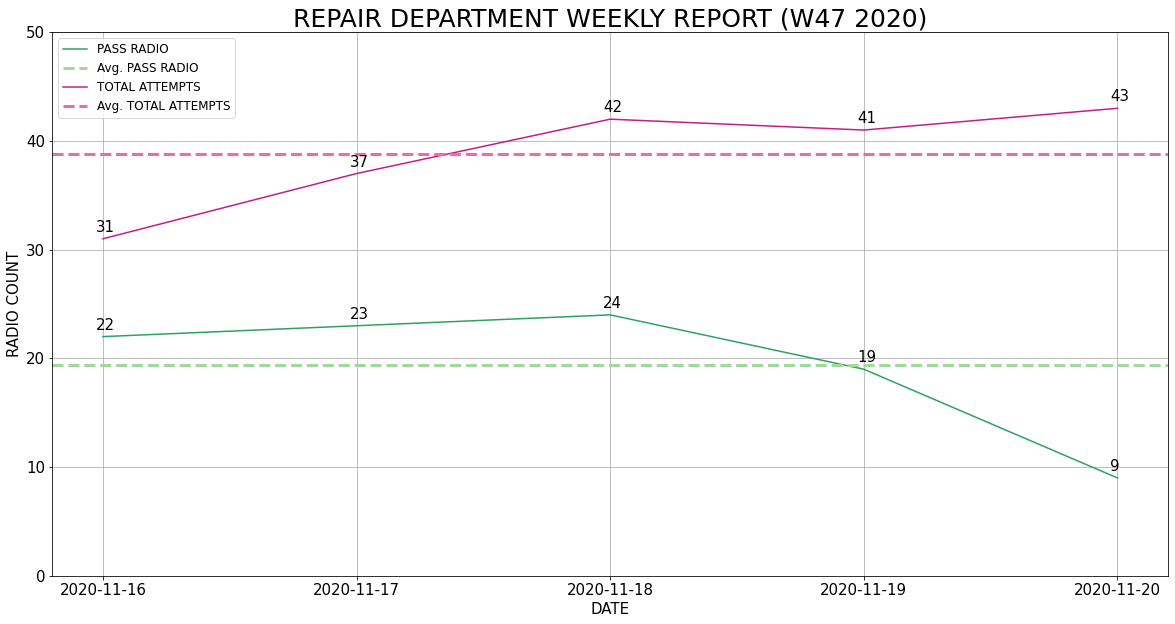

In [308]:
import matplotlib.pyplot as plt

radios_type=["KRK10101/11", "KRK10101/21"]

radios=["RF", "DIG."]

tmp = (merged[merged['ProductNo'].isin(radios_type) & merged['FAIL Category'].isin(radios)]
        .groupby(['DATE','ProductNo'])
        .count()
        .reset_index()
        .groupby('DATE')
        .sum()
        .reset_index()
        .loc[:, ['DATE','RBU 6701_SN']]
        .rename(columns={'RBU 6701_SN': "Count"})
       
     )
       


tmp1 = (merged[merged['FAIL Category'].isin(radios)]
            .groupby(['DATE','RBU 6701_SN'])
            .count()
            .reset_index()
            .groupby('DATE')
            .sum()
            .reset_index()
            .loc[:, ['DATE','FAIL Category']]
            .rename(columns={'FAIL Category': "Count"})
       
      )




tmp['DATE'] = pd.to_datetime(tmp['DATE'], dayfirst = True)

tmp = tmp.sort_values(by='DATE',ascending=True).reset_index()

tmp['DATE'] = tmp['DATE'].astype(str)


tmp1['DATE'] = pd.to_datetime(tmp1['DATE'], dayfirst = True)

tmp1 = tmp1.sort_values(by='DATE',ascending=True).reset_index()

tmp1['DATE'] = tmp1['DATE'].astype(str)


average_tmp = np.average(tmp['Count'])

average_tmp1 = np.average(tmp1['Count'])




from matplotlib.ticker import MaxNLocator
plt.rcParams.update({'font.size': 15})
#plt.rcParams["figure.figsize"] = [20,9]


fig, ax = plt.subplots(figsize=(20, 10))
#fig.yaxis.set_major_locator(MaxNLocator(integer=True))

x = np.array(tmp['DATE'])
y = np.array(tmp['Count'])

y1 = np.array(tmp1['Count'])

values = list(tmp1['Count'])
values1 = list(tmp['Count'])

plt.xlabel('DATE')
plt.ylabel('RADIO COUNT')


plt.title('REPAIR DEPARTMENT WEEKLY REPORT (W47 2020)', fontsize=25)

ax.plot(x, y, color='#2ca25f', linestyle='solid', label='PASS RADIO')
ax.axhline(average_tmp, color="#a1d99b", linestyle='dashed', linewidth=3)

ax.plot(x, y1, color='#c51b8a', linestyle='solid', label='TOTAL ATTEMPTS')

ax.axhline(average_tmp1, color="#f768a1", linestyle='dashed', linewidth=3)



for i, v in enumerate(values):
    plt.annotate(str(v), xy=(i,v), xytext=(-7,7), textcoords='offset points')
    
for i, v in enumerate(values1):
    plt.annotate(str(v), xy=(i,v), xytext=(-7,7), textcoords='offset points')
    
plt.ylim(0, 50)

plt.legend(['PASS RADIO', 'Avg. PASS RADIO','TOTAL ATTEMPTS', 'Avg. TOTAL ATTEMPTS'], fontsize=12)

plt.grid()
plt.show()

fig.savefig(os.path.join(figpath, "Repair_department_weekly_report_Radio_W47_linegraph.png"))

# plt.annotate(
#         label,                      # Use `label` as label
#         (x_value, y_value),         # Place label at end of the bar
#         xytext=(space, 0),          # Horizontally shift label by `space`
#         textcoords="offset points", # Interpret `xytext` as offset in points
#         va='center',                # Vertically center label
#         ha=ha) 

#plt.rcParams["figure.figsize"] = [20,9]




# p = gg.ggplot(tmp, gg.aes(x='DATE', y='Count')) + \
#     gg.geom_line(color='black', size=4, linetype='solid') + \
#     gg.theme_classic() + \
#     gg.theme(axis_text_x = gg.element_text(color="black", size=8, angle=45, hjust=-5)) + \
#     gg.labs(title= 'REPAIR DEPARTMENT WEEKLY REPORT',
#             x="DATE",
#             y="RADIO COUNT"
#            ) 

# p   
    
# # #g = p + gg.theme(figure_size=(11, 6), axis_text_x=gg.element_text(rotation=45)


## WEEKLY Report MBFT

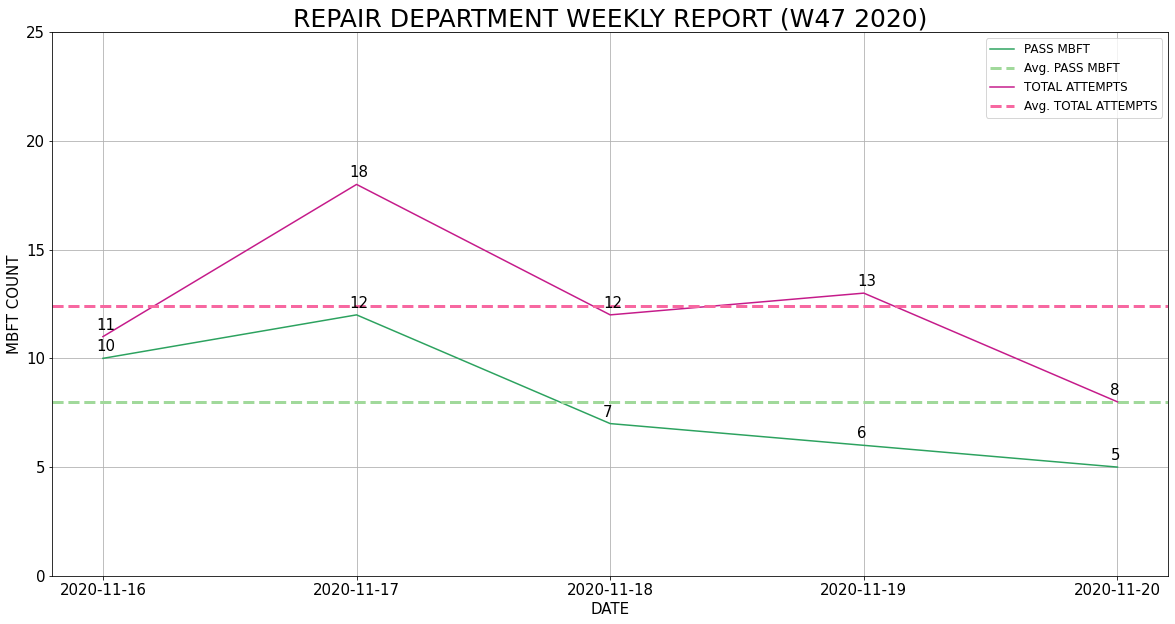

In [302]:


MBFT=["ROA1286713/1"]

tmp = (merged[merged['ProductNo'].isin(MBFT) & merged['FAIL Category'].isin(['MBFT'])]
        .groupby(['DATE','ProductNo'])
        .count()
        .reset_index()
        .groupby('DATE')
        .sum()
        .reset_index()
        .loc[:, ['DATE','RBU 6701_SN']]
        .rename(columns={'RBU 6701_SN': "Count"})
       )


tmp1 = (merged[merged['FAIL Category'].isin(['MBFT'])]
            .groupby(['DATE','RBU 6701_SN'])
            .count()
            .reset_index()
            .groupby('DATE')
            .sum()
            .reset_index()
            .loc[:, ['DATE','FAIL Category']]
            .rename(columns={'FAIL Category': "Count"})
       
      )


tmp['DATE'] = pd.to_datetime(tmp['DATE'], dayfirst = True)

tmp = tmp.sort_values(by='DATE',ascending=True).reset_index()

tmp['DATE'] = tmp['DATE'].astype(str)


tmp1['DATE'] = pd.to_datetime(tmp1['DATE'], dayfirst = True)

tmp1 = tmp1.sort_values(by='DATE',ascending=True).reset_index()

tmp1['DATE'] = tmp1['DATE'].astype(str)


average_tmp = np.average(tmp['Count'])

average_tmp1 = np.average(tmp1['Count'])



from matplotlib.ticker import MaxNLocator

plt.rcParams.update({'font.size': 15})
#plt.rcParams["figure.figsize"] = [20,9]


fig, ax = plt.subplots(figsize=(20, 10))

#fig.yaxis.set_major_locator(MaxNLocator(integer=True))

x = np.array(tmp['DATE'])
y = np.array(tmp['Count'])

y1 = np.array(tmp1['Count'])

values = list(tmp1['Count'])
values1 = list(tmp['Count'])

plt.xlabel('DATE')
plt.ylabel('MBFT COUNT')


plt.title('REPAIR DEPARTMENT WEEKLY REPORT (W47 2020)', fontsize=25)

ax.plot(x, y, color='#2ca25f', linestyle='solid', label='PASS MBFT')
ax.axhline(average_tmp, color="#a1d99b", linestyle='dashed', linewidth=3)

ax.plot(x, y1, color='#c51b8a', linestyle='solid', label='TOTAL ATTEMPTS')

ax.axhline(average_tmp1, color="#f768a1", linestyle='dashed', linewidth=3)



for i, v in enumerate(values):
    plt.annotate(str(v), xy=(i,v), xytext=(-7,7), textcoords='offset points')
    
for i, v in enumerate(values1):
    plt.annotate(str(v), xy=(i,v), xytext=(-7,7), textcoords='offset points')
    
plt.ylim(0, 25)

plt.legend(['PASS MBFT', 'Avg. PASS MBFT','TOTAL ATTEMPTS', 'Avg. TOTAL ATTEMPTS'], fontsize=12)

plt.grid()
plt.show()


fig.savefig(os.path.join(figpath, "Repair_department_weekly_report_MBFT_W47_linegraph.png"))

          


In [139]:
# tmp1 = (merged[merged['ProductNo'].isin(radios)]
#             .groupby(['DATE','ProductNo'])
#             .count()
#             .reset_index()
       
#       )
# tmp1


## Plotting for Trouble shooters

/Users/habbasi/plotnine/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/habbasi/plotnine/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Performance/W47_2020/figures/Trouble_shooters_performance.png


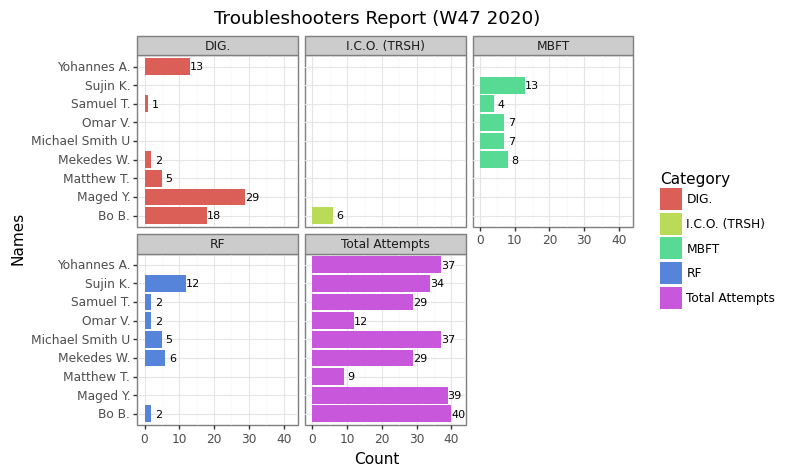

<ggplot: (7025214001)>

In [21]:
cat_condition=["DIG.", "RF", "MBFT", "I.C.O. (TRSH)"]

merged_df = (merged[merged['FAIL Category'].isin(cat_condition)]
            .groupby(['TRSH NAME','ProductNo', "FAIL Category"])
            .count()
            .reset_index()
            .groupby(['TRSH NAME', "FAIL Category"])
            .sum()
            .reset_index()
            .loc[:, ['TRSH NAME','FAIL Category', 'DATE']]
            .rename(columns={'TRSH NAME': 'Names',
                             'DATE': "Count",
                             'FAIL Category': "Category"
                            })
                 
            )

tmp = (merged[merged['FAIL Category'].isin(cat_condition)]
            .groupby(['TRSH NAME',"FAIL Category"])
            .count()
            .reset_index()
            .groupby(['TRSH NAME', "FAIL Category"])
            .sum()
            .reset_index()
            .loc[:, ['TRSH NAME','FAIL Category', 'DATE']]
            .rename(columns={'TRSH NAME': 'Names',
                             'DATE': "Count",
                             'FAIL Category': "Category"
                            })
                 
            )

ICO_TRSH = tmp[tmp['Category'] == "I.C.O. (TRSH)"]

merged_df = merged_df.append(ICO_TRSH).reset_index().drop(columns='index')



total = (merged.groupby('TRSH NAME').count()
        .reset_index()
        .loc[:, ['TRSH NAME','DATE']]
        .rename(columns={'TRSH NAME': 'Names',
                         'DATE': "Count",
                        })
        )



total['Category'] = 'Total Attempts'

total = total.loc[:, ['Names', 'Category', 'Count']]
fn = merged_df.append(total)



p = gg.ggplot(fn, gg.aes(x='Names', y='Count',fill="Category")) + \
    gg.geom_col(stat="identity") + \
    gg.theme_bw() + \
    gg.coord_flip() + \
    gg.geom_text(gg.aes(y = "Count",label = "Count"),  
                 size=8, nudge_x=0, nudge_y=2, show_legend=True) + \
    gg.labs(title= 'Troubleshooters Report (W47 2020)')

   
    
p = p + gg.facet_wrap('~ Category', nrow=2)



#print(p + facet_wrap('~ mask', nrow=2, scales="free_y"))
    

    

gg.ggsave(filename='Trouble_shooters_performance.png', plot = p, path = figpath)


p



In [60]:
merged_df

,Names,Category,Count
0,Bo B.,DIG.,18
1,Bo B.,RF,2
2,Maged Y.,DIG.,29
3,Matthew T.,DIG.,5
4,Mekedes W.,DIG.,2
5,Mekedes W.,MBFT,8
6,Mekedes W.,RF,6
7,Michael Smith U,MBFT,7
8,Michael Smith U,RF,5
9,Omar V.,MBFT,7


## KPI

/Users/habbasi/plotnine/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/habbasi/plotnine/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Performance/W47_2020/figures/Trouble_shooters_KPI.png


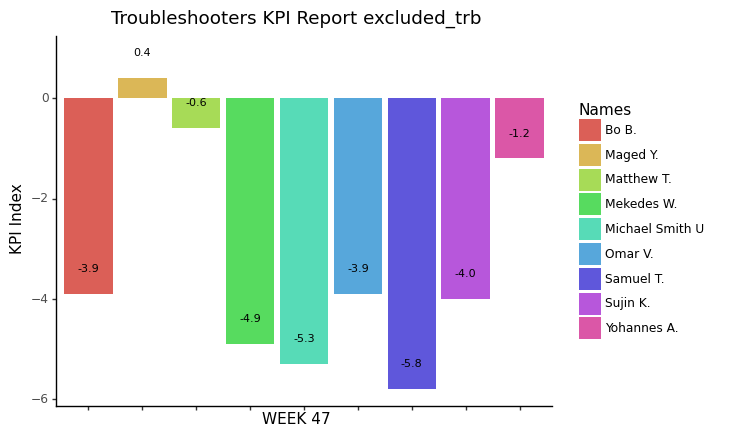

<ggplot: (7019705289)>

In [101]:
min_threshold_radio=25
target_radio=35
min_threshold_board=40
target_board=50



def repair_dept_kpi(x):
    
    if (x['Category'] == 'RF') | (x['Category'] == 'DIG.'):
        return "Radio"
    
    elif (x['Category'] == 'MBFT') | (x['Category'] == "I.C.O. (TRSH)"):
        return "Board"
    

    

    
    
    
def KPI_radio(x):
    
    if (x['Category'] == "Radio") & (x['Names'] == 'Matthew T.'):

        k = (x['Count'] - min_threshold_radio) / (target_radio - min_threshold_radio)
    
        return k * 0.3
    
    elif (x['Category'] == "Radio") & (x['Names'] == 'Omar V.'):

        k = (x['Count'] - min_threshold_radio) / (target_radio - min_threshold_radio)
    
        return k * 0.7
    
    elif (x['Category'] == "Radio"):

        k = (x['Count'] - min_threshold_radio) / (target_radio - min_threshold_radio)
    
        return k 


def KPI_board(x):
    
    if (x['Category'] == "Board") & (x['Names'] == 'Matthew T.'):

        k = (x['Count'] - min_threshold_board) / (target_board - min_threshold_board)
    
        return k * 0.4
    
    elif (x['Category'] == "Board") & (x['Names'] == 'Omar V.'):

        k = (x['Count'] - min_threshold_board) / (target_board - min_threshold_board)
    
        return k * 0.7
    
    elif (x['Category'] == "Board"):

        k = (x['Count'] - min_threshold_board) / (target_board - min_threshold_board)
    
        return k


    
        
kpi = merged_df.copy()


kpi['Category'] = kpi.apply(repair_dept_kpi, axis=1)


kpi = (kpi.groupby(["Names", "Category"])
       .sum()
       .reset_index()
       
      )



kpi['KPI_Radio'] = kpi.apply(KPI_radio, axis=1)



kpi['KPI_board'] = kpi.apply(KPI_board, axis=1)





kpi = (kpi.groupby("Names")
       .sum()
       .reset_index()
       .assign(Total_Kpi = lambda x: np.round(x['KPI_Radio'] + x['KPI_board'], 1))
      )




g = gg.ggplot(kpi, gg.aes(x='Names', y='Total_Kpi',fill="Names")) + \
    gg.geom_col(stat="identity") + \
    gg.theme_classic() + \
    gg.geom_text(gg.aes(y = "Total_Kpi",label = "Total_Kpi"),  
                 size=8, nudge_x=0, nudge_y=0.5, show_legend=True) + \
    gg.labs(title= 'Troubleshooters KPI Report excluded_trb',
            x="WEEK 47",
            y="KPI Index"
           ) + \
    gg.theme(axis_text_x=gg.element_blank())
    


 


    

gg.ggsave(filename='Trouble_shooters_KPI.png', plot = g, path = figpath)


g

In [827]:
merged['FAIL Category'].unique()

array(['DIG.', 'MBFT', 'RF', 'Mech.', 'Validation Radio Test', nan, 'MVI',
       'SMA Repair', 'Re-work Order'], dtype=object)

### Plotting for Pre-trouble shooters

In [153]:
excluded_trb=['Phat N.', 'Tuan L.']


merged_trb = merged.copy()

trb = ['DIG.', 'RF','Mech.', 'ALT2', 'Validation Radio Test', 'Re-work Order']

merged_trb = merged_trb.loc[merged_trb['FAIL Category'].isin(trb)]

## Calling RF and DIG. as Radio and count twice for similar person

merged_trb['FAIL Category'] = merged_trb.apply(repair_dept_namechange, axis=1)

## Dropping duplicate for pretrouble shooters

merged_trb = (merged_trb.drop_duplicates(['RBU 6701_SN',"FAIL Category",'PRE-TRSH Person'], keep='last')
)


merged_trb = (merged_trb.groupby(['PRE-TRSH Person',"FAIL Category"])
              .count()
              .reset_index()
              .loc[:, ['PRE-TRSH Person','FAIL Category', 'DATE']]
              .rename(columns={'PRE-TRSH Person': 'Names',
                               'FAIL Category':"Category",
                               'DATE': "Count"})
 
             )




merged_trb = merged_trb[~merged_trb['Names'].isin(excluded_trb)]

merged_trb = merged_trb[merged_trb['Names'].isin(PRETRSH_NAME)]


pre = gg.ggplot(merged_trb, gg.aes(x='Names', y='Count', fill="Category")) + \
    gg.geom_bar(stat="identity") + \
    gg.theme_bw() + \
    gg.geom_text(gg.aes(y = "Count",label = "Count"),  
                 size=8, nudge_x=0, nudge_y=1, show_legend=False) + \
    gg.labs(title= 'Pre-Troubleshooters Report (W47 2020)') 


    

    

#gg.ggsave(filename='Pretrouble_shooters_performance.png', plot = pre, path = figpath)


merged_trb

,Names,Category,Count
0,Alton W.,Mech.,1
1,Alton W.,Radio,17
2,Alton W.,Validation Radio Test,6
4,Eric T.,Mech.,1
5,Eric T.,Radio,13
6,Eric T.,Validation Radio Test,30
7,Kazeem K.,Mech.,1
8,Kazeem K.,Radio,47
9,Luis G.,Mech.,2
10,Luis G.,Radio,14


### KPI for Pre-trouble shooters

/Users/habbasi/plotnine/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/habbasi/plotnine/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Performance/W47_2020/figures/Pre-Trouble_shooters_KPI.png


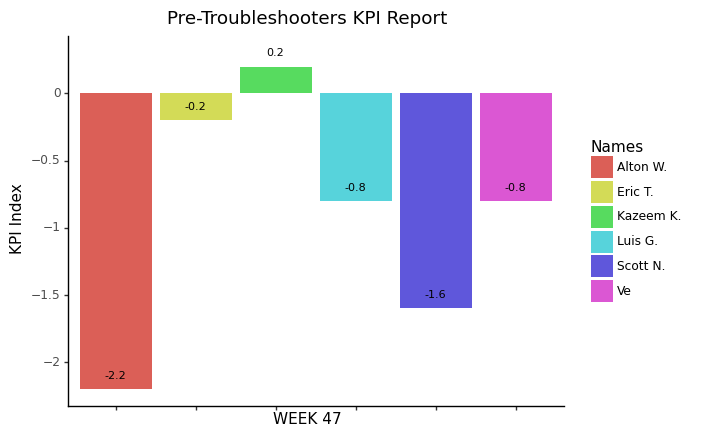

<ggplot: (7022976065)>

In [121]:
min_threshold_radio=46
target_radio=56
min_threshold_rework=22
target_rework=32



def pre_TRSH_kpi(x):
    
    if (x['Category'] == 'Radio') | (x['Category'] == 'Mech.') | (x['Category'] == 'Validation Radio Test'):
        return "Radio"
    
    elif (x['Category'] == 'Re-work Order'):
        return "Rework"
    

    

    
    
    
def KPI_preTRSH_radio(x):
    
    if (x['Category'] == "Radio"):

        k = (x['Count'] - min_threshold_radio) / (target_radio - min_threshold_radio)
    
        return k 


def KPI_preTRSH_rework(x):
    
    if (x['Category'] == "Rework"):

        k = (x['Count'] - min_threshold_rework) / (target_rework- min_threshold_rework)
    
        return k


    
        
KPI_preTRSH = merged_trb.copy()


KPI_preTRSH['Category'] = KPI_preTRSH.apply(pre_TRSH_kpi, axis=1)


KPI_preTRSH = (KPI_preTRSH.groupby(["Names", "Category"])
       .sum()
       .reset_index()
       
      )



KPI_preTRSH['KPI_Radio'] = KPI_preTRSH.apply(KPI_preTRSH_radio, axis=1)



KPI_preTRSH['KPI_Rework'] = KPI_preTRSH.apply(KPI_preTRSH_rework, axis=1)





KPI_preTRSH = (KPI_preTRSH.groupby("Names")
       .sum()
       .reset_index()
       .assign(Total_Kpi = lambda x: np.round(x['KPI_Radio'] + x['KPI_Rework'], 1))
      )





g = gg.ggplot(KPI_preTRSH, gg.aes(x='Names', y='Total_Kpi',fill="Names")) + \
    gg.geom_col(stat="identity") + \
    gg.theme_classic() + \
    gg.geom_text(gg.aes(y = "Total_Kpi",label = "Total_Kpi"),  
                 size=8, nudge_x=0, nudge_y=0.1, show_legend=True) + \
    gg.labs(title= 'Pre-Troubleshooters KPI Report',
            x="WEEK 47",
            y="KPI Index"
           ) + \
    gg.theme(axis_text_x=gg.element_blank())
    


 


    

gg.ggsave(filename='Pre-Trouble_shooters_KPI.png', plot = g, path = figpath)


g

In [65]:
## categories for pre-troubleshooters
# trb = ['DIG.', 'RF','Mech.', 'ALT2', 'Validation Radio Test']

# #excluded_trb=['Tuan L.', 'Phat N.']


# excluded_trb=['Tuan', 'Phat']


# merged_trb = merged_trb.loc[merged_trb['FAIL Category'].isin(trb)]

#merged_trb['FAIL Category'] = merged_trb.apply(repair_dept_namechange, axis=1)



#               .groupby(['PRE-TRSH Person',"FAIL Category"])
#               .count()
#               .reset_index()
#               .loc[:, ['PRE-TRSH Person','FAIL Category', 'DATE']]
#               .rename(columns={'PRE-TRSH Person': 'Names',
#                                'FAIL Category':"Category",
#                                'DATE': "Count"})
 
#              )


# merged_trb = merged_trb[~merged_trb['Names'].isin(excluded_trb)]


## MVI Weekly report

/Users/habbasi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/habbasi/plotnine/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/habbasi/plotnine/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Performance/W47_2020/figures/MVI_performance_modified.png


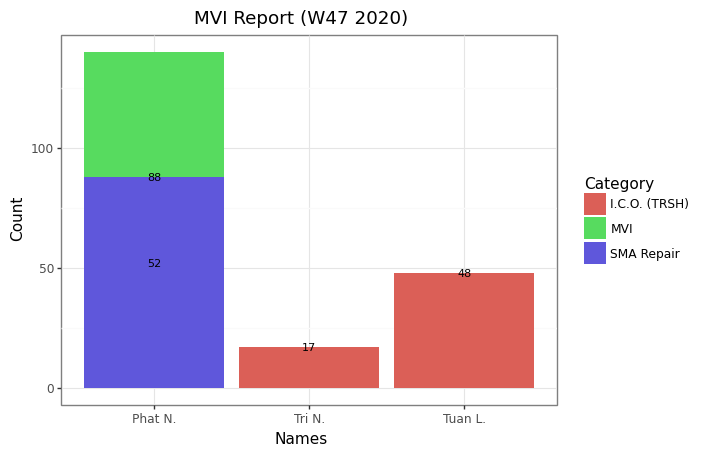

<ggplot: (7019312109)>

In [105]:
mvi_trb=['Tri N.', 'Tuan L.', 'Phat N.']


mvi = merged[merged['PRE-TRSH Person'].isin(mvi_trb)]


mvi['FAIL Category'] = mvi.apply(repair_dept_namechange, axis=1)
      



#### change = mvi.sample(round(0.2 * len(mvi))).index


#### mvi.loc[change,'FAIL Category'] = 'SMA Repair'




mvi = (mvi.groupby(['PRE-TRSH Person',"FAIL Category"])
       .count()
       .reset_index()
       .loc[:, ['PRE-TRSH Person','FAIL Category', 'DATE']]
       .rename(columns={'PRE-TRSH Person': 'Names',
                               'FAIL Category':"Category",
                               'DATE': "Count"})
 
             )


mvi_plot = gg.ggplot(mvi, gg.aes(x='Names', y='Count', fill="Category")) + \
    gg.geom_bar(stat="identity") + \
    gg.theme_bw() + \
    gg.geom_text(gg.aes(y = "Count",label = "Count"),  
                 size=8, nudge_x=0, nudge_y=0.1, show_legend=True) + \
    gg.labs(title= 'MVI Report (W47 2020)') 


    

    

gg.ggsave(filename='MVI_performance_modified.png', plot = mvi_plot, path = figpath)



mvi_plot

In [106]:
mvi

,Names,Category,Count
0,Phat N.,MVI,52
1,Phat N.,SMA Repair,88
2,Tri N.,I.C.O. (TRSH),17
3,Tuan L.,I.C.O. (TRSH),48


### KPI for MVI

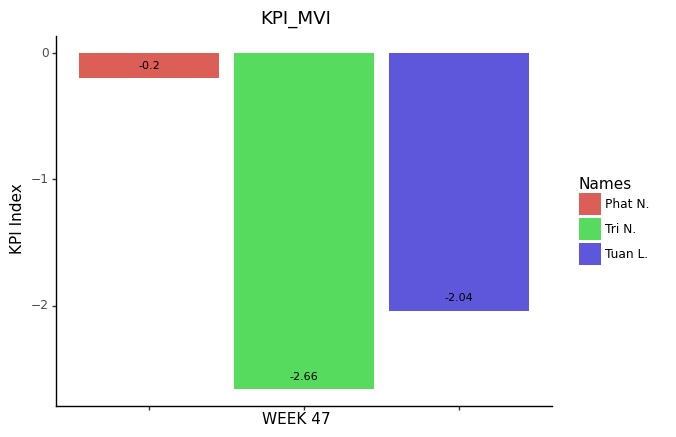

<ggplot: (7021696641)>

In [119]:
min_threshold_board_mvi=150
target_board_mvi=200




def mvi_kpi(x):
    
    if (x['Category'] == 'MVI') | (x['Category'] == 'SMA Repair') | (x['Category'] == 'I.C.O. (TRSH)'):
        return "board_mvi"
    

    

    

    
    
    
def KPI_MVI(x):
    
    if (x['Category'] == "board_mvi"):

        k = (x['Count'] - min_threshold_board_mvi) / (target_board_mvi - min_threshold_board_mvi)
    
        return k 



    
        
KPI_mvi = mvi.copy()


KPI_mvi['Category'] = KPI_mvi.apply(mvi_kpi, axis=1)


KPI_mvi = (KPI_mvi.groupby(["Names", "Category"])
       .sum()
       .reset_index()
       
      )


KPI_mvi['KPI_MVI'] = KPI_mvi.apply(KPI_MVI, axis=1)

KPI_mvi




g = gg.ggplot(KPI_mvi, gg.aes(x='Names', y='KPI_MVI',fill="Names")) + \
    gg.geom_col(stat="identity") + \
    gg.theme_classic() + \
    gg.geom_text(gg.aes(y = "KPI_MVI",label = "KPI_MVI"),  
                 size=8, nudge_x=0, nudge_y=0.1, show_legend=True) + \
    gg.labs(title= 'KPI_MVI',
            x="WEEK 47",
            y="KPI Index"
           ) + \
    gg.theme(axis_text_x=gg.element_blank())
    


 


    
gg.ggsave(filename='KPI_MVI.png', plot = g, path = figpath)


g



## Soldering Weekly report


/Users/habbasi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/habbasi/plotnine/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/habbasi/plotnine/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Performance/W47_2020/figures/soldering_performance.png


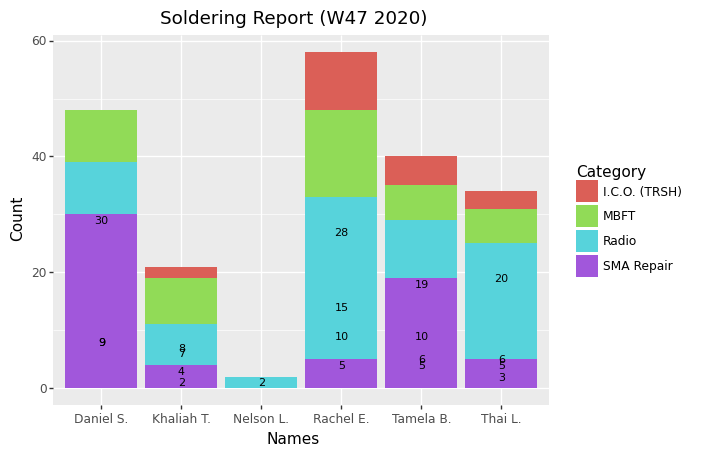

<ggplot: (7019315841)>

In [131]:
def repairsoldering_dept_namechange(x):
    
    if (x['FAIL Category'] == 'RF') | (x['FAIL Category'] == 'DIG.'):
        return "Radio"

    elif (x['FAIL Category'] == 'SMA Repair') | (x['FAIL Category'] == 'SMA REPAIR'):
        return "SMA Repair"
    
    elif (x['FAIL Category'] == 'I.C.O. (TRSH)'):
        return "I.C.O. (TRSH)"
      
    elif (x['FAIL Category'] ==  "MBFT"):
        return "MBFT"



repair = merged[merged['REPAIR Person'].isin(REPAIR_NAME)]

repair['FAIL Category'] = repair.apply(repairsoldering_dept_namechange, axis=1)


repair = (repair.drop_duplicates(['RBU 6701_SN',"FAIL Category",'REPAIR Person', 'REPAIR NOTES'], keep='last')
)




repair = (repair.groupby(['FAIL Category','REPAIR Person'])
          .count()
          .reset_index()
          .loc[:, ['FAIL Category', 'REPAIR Person','DATE']]
          .rename(columns={'REPAIR Person': 'Names',
                               'FAIL Category':"Category",
                               'DATE': "Count"})
         )


        
soldering = gg.ggplot(repair, gg.aes(x='Names', y='Count', fill="Category")) + \
    gg.geom_bar(stat="identity") + \
    gg.geom_text(gg.aes(y = "Count",label = "Count"),  
                 size=8, nudge_x=0, nudge_y=-1, show_legend=True) + \
    gg.labs(title= 'Soldering Report (W47 2020)') 


    

    

gg.ggsave(filename='soldering_performance.png', plot = soldering, path = figpath)


soldering

## Soldering KPI

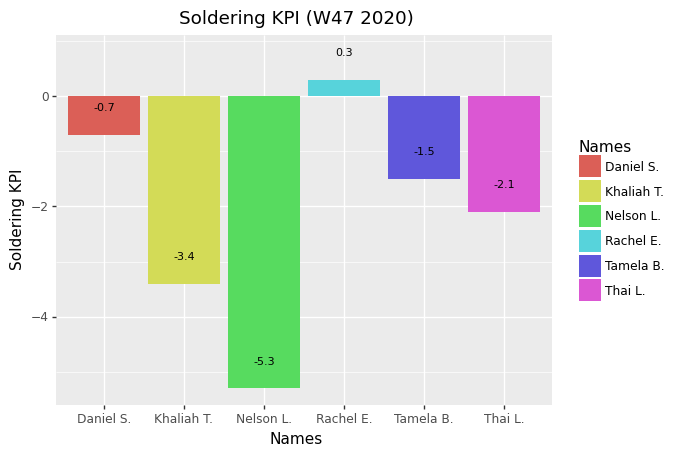

<ggplot: (7023370529)>

In [150]:
min_threshold_soldering=55
target_soldering=65




soldering_KPI = repair.groupby("Names").sum().reset_index()

    

    

soldering_KPI['Soldering KPI'] = (soldering_KPI['Count']
                                  .apply(lambda x: (x - min_threshold_soldering)/(target_soldering - min_threshold_soldering))
                                 )
soldering_KPI


        
soldering_kpi = gg.ggplot(soldering_KPI, gg.aes(x='Names', y='Soldering KPI', fill='Names')) + \
    gg.geom_bar(stat="identity") + \
    gg.geom_text(gg.aes(y = "Soldering KPI",label = "Soldering KPI"),  
                 size=8, nudge_x=0, nudge_y=0.5, show_legend=True) + \
    gg.labs(title= 'Soldering KPI (W47 2020)') 


    

    

gg.ggsave(filename='soldering_KPI.png', plot = soldering_kpi, path = figpath)


soldering_kpi



,Category,DATE
0,ALT2,3
1,DIG.,80
2,I.C.O. (TRSH),71
3,MBFT,41
4,MVI,53
5,Mech.,2
6,RF,40
7,ROA Scrap,4
8,Re-work Order,47
9,SMA Repair,88


## Repair department weekly report

In [179]:
def status_ALT2(x):
    if (x['FAIL Category'] == "Mech.") & (x['STATUS'] == "ALT2"):
        return "ALT2"
    elif (x['FAIL Category'] == "Mech.") & (x['STATUS'] != "ALT2"):
        return "Mech."
    
    elif (x['FAIL Category'] == "SMA Repair") | (x['FAIL Category'] == "SMA REPAIR"):
        return "SMA Repair"
    
    elif (x['STATUS'] == "Pre-Scrap"):
        return "ROA Scrap"
    
    else:
        return x['FAIL Category']

tmp = merged.copy()
tmp['Category'] = tmp.apply(status_ALT2, axis=1)

tmp1 = tmp.drop_duplicates(['RBU 6701_SN',"FAIL Category"], keep='last')

tmp1 = (tmp1.groupby('Category')
.count()
.reset_index()
.loc[:, ['Category', 'DATE']]
.rename(columns={'DATE': "Count"})

      )
tmp1

,Category,Count
0,ALT2,3
1,DIG.,80
2,I.C.O. (TRSH),71
3,MBFT,41
4,MVI,53
5,Mech.,2
6,RF,40
7,ROA Scrap,4
8,Re-work Order,47
9,SMA Repair,88


## Pie chart of Repair Department Weekly Report

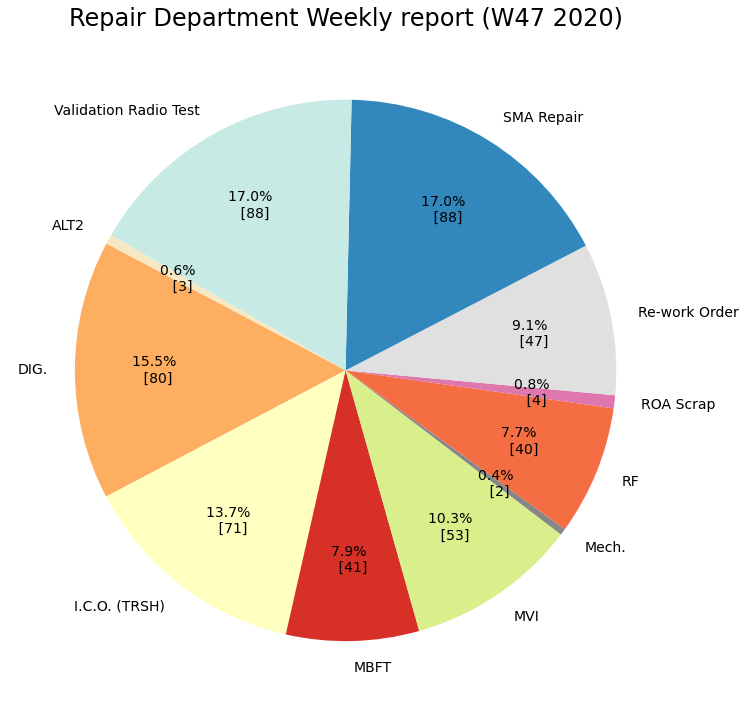

In [261]:
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['font.size'] = 20


labels = tmp1['Category'].unique()

values = tmp1['Count'].values



def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(np.round(pct*total/100.0))
        return '{p:.1f}% \n [{v:d}]'.format(p=pct,v=val)
    return my_autopct


mapping_colors = {'ALT2': '#f6e8c3',
                 'DIG.': '#fdae61',
                 'I.C.O. (TRSH)': '#ffffbf',
                 'MBFT': '#d73027',
                 'MVI': '#d9ef8b',
                 'Mech.': '#878787',
                 'RF': '#f46d43',
                 'ROA Scrap': '#de77ae',
                 'Re-work Order': '#e0e0e0',
                 'SMA Repair': '#3288bd',
                 'Validation Radio Test': '#c7eae5'}



fig, ax = plt.subplots(figsize=(20, 10))
ax.pie(values,labels=labels, colors = [mapping_colors[key] for key in labels], autopct=make_autopct(values),
        shadow=False, startangle=150, pctdistance=0.7, textprops={'color':"k", 
                                                                  'fontsize': 14}, 
       rotatelabels=False)
# Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.title('Repair Department Weekly report (W47 2020)')
plt.savefig(os.path.join(figpath, 'piechart_Repair Department Weekly report (W47 2020).png'), bbox_inches = 'tight')

